<a href="https://colab.research.google.com/github/amyynguyen/MATH5750_Math-of-Data-Science/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Math 5750/6880: Mathematics of Data Science \\
Project 1

# 3. Python and Google Colab
Project Euler Problem  
https://projecteuler.net/

In [ ]:
# your code here
# Problem 6: Sum Square Difference
n = 100
sum_of_squares = 0
sum_numbers = 0

for i in range(1, n+1):
  # Adding square of i
  sum_of_squares += i**2

  #Adding i
  sum_numbers += i

square_of_sum = sum_numbers**2
difference = square_of_sum - sum_of_squares

print("Difference = ", difference)

Difference =  25164150


# 4. Regression Analysis
California housing data  
https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split



In [ ]:
# Load the California housing data
cal = fetch_california_housing(as_frame=True)
X, y = cal.data, cal.target
feature_names = X.columns
print(feature_names)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')


Median house value:  1.797
Test r^2:  0.5943232652466202
Train r^2:  0.6088968118672871
MAE:  0.535126133655451
RMSE:  0.5289841670367209
MedInc: 0.4333334066887783
HouseAge: 0.009293243374170923
AveRooms: -0.09864337387965161
AveBedrms: 0.5932154870104376
Population: -7.561925018398363e-06
AveOccup: -0.004745163831785233
Latitude: -0.4214493359493122
Longitude: -0.43416604139119447



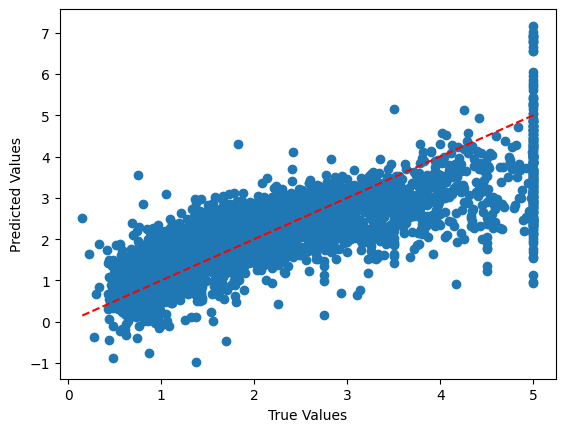

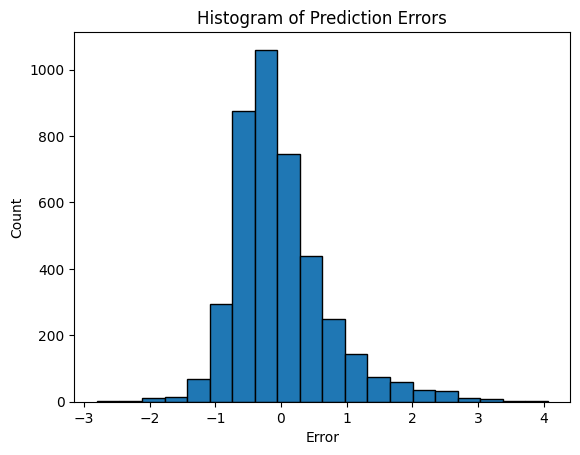


Random Forest Test r^2:  0.7989135306875962
Random Forest Train r^2:  0.9727350039407251
Random Forest MAE:  0.33578886286337223
Random Forest RMSE:  0.5131491345417962
      Feature  Importance
0      MedInc    0.529520
5    AveOccup    0.135255
6    Latitude    0.084846
7   Longitude    0.083737
1    HouseAge    0.055837
2    AveRooms    0.047262
4  Population    0.032957
3   AveBedrms    0.030587


In [ ]:
# your code here
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Calculating the median house value of the dataset
median_house_value = np.median(y)
print("Median house value: ", median_house_value)

# Fit model
linreg_fit = LinearRegression().fit(X_train, y_train)

# Predictions
y_test_pred = linreg_fit.predict(X_test)
y_train_pred = linreg_fit.predict(X_train)

# Metrics
r2_test = r2_score(y_test, y_test_pred)
print("Test r^2: ", r2)

r2_train = r2_score(y_train, y_train_pred)
print("Train r^2: ", r2_train)

MAE = mean_absolute_error(y_test, y_pred)
print("MAE: ", MAE)

RMSE = mean_squared_error(y_test, y_test_pred)
print("RMSE: ", MSE)

# Coefficient of the linear regression model
linreg_coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': linreg_fit.coef_
    }).sort_values('Coefficient', ascending = False)
print("Linear Regression Coefficient:")
print(linreg_coef_df)

# Scatterplot: predicted vs true
plt.scatter(y_test, y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()
print( )

# Histogram of errors
errors = y_test - y_test_pred
plt.hist(errors, bins=20, edgecolor = "black")
plt.title("Histogram of Prediction Errors")
plt.xlabel("Error")
plt.ylabel("Count")
plt.show()
print( )


# --------
# Different regression methods on this dataset
# --------
rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf_fit = rf.fit(X_train, y_train)
y_test_pred_rf = rf_fit.predict(X_test)
y_train_pred_rf = rf_fit.predict(X_train)

r2_test_rf = r2_score(y_test, y_test_pred_rf)
print("Random Forest Test r^2: ", r2_rf)

r2_train_rf = r2_score(y_train, y_train_pred_rf)
print("Random Forest Train r^2: ", r2_train_rf)

MAE_rf = mean_absolute_error(y_test, y_test_pred_rf)
print("Random Forest MAE: ", MAE_rf)

RMSE_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
print("Random Forest RMSE: ", RMSE_rf)

# Importance for Random Forest
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_fit.feature_importances_
    }).sort_values('Importance', ascending = False)
print("Random Forest Feature Importance:")
print(importance_df)

# 5. Classification Analysis
Diagnostic Wisconsin Breast Cancer Database  
https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load Breast Cancer Wisconsin Dataset
data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target                  # 0 = malignant, 1 = benign
feature_names = X.columns
label_names = {0: "malignant", 1: "benign"}
print(feature_names)

# Train/Test Split (stratified to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

# Preprocess Data (fit on train ONLY; then transform both)
scaler = StandardScaler(with_mean=True, with_std=True)
X_train_std = scaler.fit_transform(X_train)   # fit on train
X_test_std  = scaler.transform(X_test)        # transform test with train stats

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


In [ ]:
# your code here
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, confusion_matrix,
                             roc_auc_score, average_precision_score,
                             roc_curve, precision_recall_curve)

data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)